
# 目標
- データの中身を確認する.
- 各変数の意味を理解する.
- 視覚化する.
    - event display

## 準備

In [1]:
import sys
sys.path.append("../yandex/")
#sys.path.append("../lib/")
import os
import pandas as pd
#import xgboost
import utils
import scoring
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)

## データ読み込み
- 部分的読み出しにしたい.

In [3]:
DATA_PATH = "../your_data_dir/"

- 他の人もここを変えずにできるように, とりあえずIDAO dir直下にyour_data_dirっていうシンボリックリンクを置いて, 自分のPCにDLしたデータのdirをみるようにしました. もっと良い方法があれば教えてください.

In [4]:
train, test = utils.load_data_csv(
    DATA_PATH, utils.SIMPLE_FEATURE_COLUMNS)

/Users/yoneda/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## 中身をみる
- trainデータの数: 5,445,705
- testデータの数: 726,095

In [8]:
train.head()

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  avg_cs[3]  \
0      47      31      13      15   2.000000   1.580645   1.153846   1.133333   
1      92      19      11      26   2.750000   2.789474   1.363636   1.230769   
2     100      21      11      12   2.930000   2.428571   1.181818   1.083333   
3      74      27      13      20   3.067568   2.518518   1.923077   1.300000   
4      18      22       8       8   1.833333   1.954546   1.125000   1.750000   

   ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  MatchedHit_TYPE[2]  \
0     8                   2                   2                   2   
1     8                   2                   2                   2   
2     8                   2                   2                   2   
3     8                   2                   2                   2   
4     8                   2                   2                   2   

   MatchedHit_TYPE[3]  MatchedHit_X[0]  MatchedHit_X[1]  MatchedHit_X[2]  \
0                   2       -2685.0800         -2954.30         -3140.97   
1                   1         739.5500           852.51           827.00   
2                   2       -1595.1300         -1748.45         -1933.97   
3                   2       -1708.8291         -1816.95         -1933.97   
4                   2       -1504.6300         -1651.95         -1815.97   

   MatchedHit_X[3]  MatchedHit_Y[0]  MatchedHit_Y[1]  MatchedHit_Y[2]  \
0         -3609.17       1373.34810       1481.26220       1590.39750   
1           758.72       2387.72220       2575.97460       2764.19650   
2         -2066.67       -318.64474       -344.52970       -221.99326   
3         -2066.67       -191.40443       -207.12927       -221.99326   
4         -1940.67        941.44840       1014.66280       1089.19820   

   MatchedHit_Y[3]  MatchedHit_Z[0]  MatchedHit_Z[1]  MatchedHit_Z[2]  \
0       1701.06760        15123.045        16327.633        17520.826   
1       2952.10330        15212.598        16420.576        17614.854   
2       -235.32233        15317.953        16522.060        17598.300   
3       -235.32233        15201.410        16405.555        17598.300   
4       1165.16860        15205.489        16409.953        17603.021   

   MatchedHit_Z[3]  MatchedHit_DX[0]  MatchedHit_DX[1]  MatchedHit_DX[2]  \
0        18729.324         25.500000             27.50             118.0   
1        18824.430         25.500000             27.50             118.0   
2        18806.352         12.750000             13.75              59.0   
3        18806.352         12.948485             13.75              59.0   
4        18811.395         12.750000             13.75              59.0   

   MatchedHit_DX[3]  MatchedHit_DY[0]  MatchedHit_DY[1]  MatchedHit_DY[2]  \
0             126.0        126.278550        136.278490        146.278410   
1             756.0        126.278550        136.278490        146.278410   
2              63.0         63.078957         68.078926         73.078896   
3              63.0         63.038590         68.078926         73.078896   
4              63.0         63.078957         68.078926         73.078896   

   MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  MatchedHit_DZ[2]  \
0         156.27835         33.954950          33.99096         34.026966   
1         156.27835         33.954950          33.99096         34.026966   
2          78.07886         33.727364          33.74537         33.763374   
3          78.07886         33.727220          33.74537         33.763374   
4          78.07886         33.727364          33.74537         33.763374   

   MatchedHit_DZ[3]  MatchedHit_T[0]  MatchedHit_T[1]  MatchedHit_T[2]  \
0         34.062977                3                2                7   
1         34.062977                9               10                8   
2         33.781380               10                3                3   
3         33.781380                6                4                8   
4

In [8]:
train.tail()

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
5445700      50      17       4      11   1.940000   3.000000   1.250000   
5445701      28       5       3      10   1.785714   3.000000   1.000000   
5445702     121      57      21      14   2.363636   2.982456   1.428572   
5445703      43       5       9       9   3.441860   1.800000   1.111111   
5445704      37      11       5       6   2.621622   2.545454   1.000000   

         avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
5445700   1.272727     8                   2                   2   
5445701   1.100000     8                   2                   2   
5445702   1.285714     8                   2                   2   
5445703   1.222222     8                   2                   2   
5445704   1.000000     8                   2                   2   

         MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
5445700                   2                   2         1442.100   
5445701                   2                   2         3618.250   
5445702                   1                   1         -533.255   
5445703                   2                   2           59.325   
5445704                   2                   2         2468.450   

         MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
5445700         1529.060          1568.60          1677.82       -690.35535   
5445701         3919.910          4297.70          4593.72      -1133.35500   
5445702         -596.675          -672.17          -718.47       -366.04443   
5445703           63.885            91.60            99.52       -721.95514   
5445704         2693.110          2920.40          3121.02      -2408.84810   

         MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  \
5445700       -745.20130       -800.07790       -855.26960        15117.513   
5445701      -1216.89820      -1306.47460      -1396.36610        15199.918   
5445702       -395.67938       -424.19327       -451.07224        15317.782   
5445703       -779.30110       -836.67770       -894.36930        15117.399   
5445704      -2850.99020      -3059.56570      -3268.55640        15312.326   

         MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  \
5445700        16324.615        17518.018        18726.719         12.750000   
5445701        16322.917        17516.195        18724.771         25.500000   
5445702        16521.875        17714.572        18922.576          3.208333   
5445703        16324.493        17517.887        18726.578          6.375000   
5445704        16401.033        17593.883        18802.030         25.500000   

         MatchedHit_DX[1]  MatchedHit_DX[2]  MatchedHit_DX[3]  \
5445700         13.750000         59.000000         63.000000   
5445701         27.500000        118.000000        126.000000   
5445702          3.458333         14.833333         15.833333   
5445703          6.875000         29.500000         31.500000   
5445704         27.500000        118.000000        126.000000   

         MatchedHit_DY[0]  MatchedHit_DY[1]  MatchedHit_DY[2]  \
5445700         63.078957         68.078926         73.078896   
5445701        126.278550        136.278490        146.278410   
5445702         15.679264         16.929256         18.179249   
5445703         31.479162         33.979145         36.479130   
5445704        126.278550        136.278490        146.278410   

         MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
5445700         78.078860         33.727364         33.745370   
5445701        156.278350         33.954950         33.990960   
5445702         19.429240         33.556680         33.561180   
5445703         38.979115         33.613575         33.622578   
5445704        156.278350         33.954950         33.990960   

         MatchedHit_DZ[2]  MatchedHit_DZ[3]  MatchedHit_T[0]  MatchedHit_T[1]  \
5445700         33.763374         33.781380      

In [6]:
train_des = train.describe()

In [7]:
train.describe(include='all')

ncl[0]        ncl[1]        ncl[2]        ncl[3]     avg_cs[0]  \
count   5.445705e+06  5.445705e+06  5.445705e+06  5.445705e+06  5.445705e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    6.276603e+01  1.952890e+01  1.244132e+01  1.301181e+01  2.465974e+00   
std     3.223463e+01  1.268160e+01  7.450821e+00  6.380547e+00  6.572896e-01   
min     1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%     3.800000e+01  1.000000e+01  7.000000e+00  8.000000e+00  2.012195e+00   
50%     5.700000e+01  1.700000e+01  1.100000e+01  1.200000e+01  2.387097e+00   
75%     8.200000e+01  2.600000e+01  1.600000e+01  1.600000e+01  2.821918e+00   
max     3.340000e+02  2.050000e+02  9.100000e+01  8.700000e+01  1.334783e+01   

           avg_cs[1]     avg_cs[2]     avg_cs[3]          ndof  \
count   5.445705e+06  5.445705e+06  5.445705e+06  5.445705e+06   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean    2.116739e+00  1.446531e+00  1.359926e+00  7.931068e+00   
std     7.766294e-01  3.672948e-01  4.310826e-01  4.016884e-01   
min     0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00   
25%     1.571428e+00  1.187500e+00  1.125000e+00  8.000000e+00   
50%     2.000000e+00  1.384615e+00  1.285714e+00  8.000000e+00   
75%     2.500000e+00  1.636364e+00  1.500000e+00  8.000000e+00   
max     5.800000e+01  1.475000e+01  3.200000e+01  8.000000e+00   

        MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  MatchedHit_TYPE[2]  \
count         5.445705e+06        5.445705e+06        5.445705e+06   
unique                 NaN                 NaN                 NaN   
top                    NaN                 NaN                 NaN   
freq                   NaN                 NaN                 NaN   
mean          1.962494e+00        1.964487e+00        1.799664e+00   
std           1.899992e-01        1.850728e-01        4.394904e-01   
min           1.000000e+00        1.000000e+00        0.000000e+00   
25%           2.000000e+00        2.000000e+00        2.000000e+00   
50%           2.000000e+00        2.000000e+00        2.000000e+00   
75%           2.000000e+00        2.000000e+00        2.000000e+00   
max           2.000000e+00        2.000000e+00        2.000000e+00   

        MatchedHit_TYPE[3]  MatchedHit_X[0]  MatchedHit_X[1]  MatchedHit_X[2]  \
count         5.445705e+06     5.445705e+06     5.445705e+06     5.445705e+06   
unique                 NaN              NaN              NaN              NaN   
top                    NaN              NaN              NaN              NaN   
freq                   NaN              NaN              NaN              NaN   
mean          1.787940e+00     5.895086e-01     5.632933e-01    -1.640570e+02   
std           4.506361e-01     1.547939e+03     1.690638e+03     2.219932e+03   
min           0.000000e+00    -4.862180e+03    -5.243800e+03    -9.999000e+03   
25%           2.000000e+00    -8.154550e+02    -8.843250e+02    -1.025870e+03   
50%           2.000000e+00     7.558333e+00     8.068334e+00    -3.557000e+01   
75%           2.000000e+00     8.189250e+02     8.901850e+02     9.186000e+02   
max           2.000000e+00     4.883950e+03     5.224610e+03     5.557000e+03   

        MatchedHit_X[3]  MatchedHit_Y[0]  MatchedHit_Y[1]  MatchedHit_Y[2]  \
count      5.445705e+06     5.445705e+06     5.445705e+06     5.445705e+06   
unique              NaN              NaN              NaN              NaN   
top                 NaN              NaN              NaN              NaN   
freq                NaN              NaN              NaN              NaN   
mean      -1.816167e+02    -4.191318e+00    -4.835895e+0

In [11]:
test.head()

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
id                                                                    
0       55      12      10      15   2.127273   1.166667   1.500000   
1       43      18      12      15   2.697674   1.111111   1.333333   
2       90      34      19      29   1.800000   2.058824   1.210526   
3      141      43      15      16   4.609929   2.744186   1.466667   
4       22      18       8       9   1.636364   2.444444   1.000000   

    avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
id                                                            
0    1.600000     8                   2                   2   
1    1.600000     8                   2                   2   
2    1.344828     8                   2                   2   
3    1.125000     8                   2                   2   
4    1.555556     8                   2                   2   

    MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  MatchedHit_X[1]  \
id                                                                             
0                    2                   2        -22.33000         13.76000   
1                    2                   2      -1070.45500      -1156.07500   
2                    2                   2      -3348.08000      -3614.30000   
3                    1                   2       -213.62167       -238.30833   
4                    1                   1       -446.33835       -496.34167   

    MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  MatchedHit_Y[1]  \
id                                                                       
0          60.00000          65.7200      -1849.33730      -1833.79680   
1       -1202.87000       -1286.0700       -222.24156       -240.82657   
2       -3848.97000       -4113.1700      -1628.13240      -1758.31680   
3        -258.33667        -293.3700        483.45386        520.71850   
4        -550.00336        -588.4033        264.65280        284.41754   

    MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  MatchedHit_Z[1]  \
id                                                                       
0       -1968.07280      -2102.56400        15396.441        16404.695   
1        -258.19052       -274.01960        15117.299        16321.432   
2       -1887.17990      -2014.60830        15112.236        16315.968   
3         559.30420        663.87054        15119.840        16324.174   
4         305.50333        328.02402        15203.053        16407.324   

    MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  MatchedHit_DX[1]  \
id                                                                         
0         17597.812        18806.229         12.750000         13.750000   
1         17514.170        18722.213          6.375000          6.875000   
2         17508.303        18715.945         25.500000         27.500000   
3         17517.113        18926.592          3.208333          3.458333   
4         17600.200        18808.380          3.208333          3.458333   

    MatchedHit_DX[2]  MatchedHit_DX[3]  MatchedHit_DY[0]  MatchedHit_DY[1]  \
id                                                                           
0          59.000000         63.000000         63.078957         68.078926   
1          29.500000         31.500000         31.479162         33.979145   
2         118.000000        126.000000        126.278550        136.278490   
3          14.833333         31.500000         15.679264         16.929256   
4          14.833333         15.833333         15.679264         16.929256   

    MatchedHit_DY[2]  MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
id                                                                           
0          73.078896         78.078860         33.727364         33.745370   
1          36.479130         38.979115         33.613575         33.622578   
2         146.278410        156.278350         33.954950         33.99096

In [12]:
test.tail()

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
id                                                                        
726090      58      10      11      11   2.293103   1.600000   1.363636   
726091      51      35      26      19   2.039216   2.228571   1.730769   
726092      27      16      14      15   1.703704   1.812500   1.357143   
726093      80      10      11      20   2.262500   3.600000   1.090909   
726094      46      18      31      13   1.717391   2.833333   1.677419   

        avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
id                                                                
726090   1.181818     8                   2                   2   
726091   1.421053     8                   2                   2   
726092   1.533333     8                   2                   2   
726093   1.550000     8                   2                   2   
726094   1.384615     8                   2                   2   

        MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
id                                                                
726090                   2                   2        -2218.630   
726091                   2                   2          345.525   
726092                   2                   2          -73.330   
726093                   2                   2        -1581.130   
726094                   2                   2         1048.425   

        MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
id                                                                           
726090        -2449.450         -2641.97         -2948.67        941.44840   
726091          385.835           451.30           483.12        667.82950   
726092         -134.650          -187.17          -200.57      -1466.13980   
726093        -1679.450         -1815.97         -1940.67       1318.04600   
726094         1116.935          1206.60          1234.22       -222.16089   

        MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  \
id                                                                           
726090       1014.66280       1089.19820       1165.16860        15205.489   
726091        719.68290        771.50560        823.01324        15407.405   
726092      -1581.42420      -1695.48750      -1808.01600        15397.821   
726093       1420.96020       1525.09550       1630.86560        15206.846   
726094       -239.80707       -257.48392       -354.37665        15203.199   

        MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  \
id                                                                            
726090        16409.953        17603.021        18811.395            12.750   
726091        16614.893        17808.680        19017.764             6.375   
726092        16601.605        17793.996        19001.690            12.750   
726093        16411.416        17604.592        18813.072            12.750   
726094        16410.436        17603.973        18929.523             6.375   

        MatchedHit_DX[1]  MatchedHit_DX[2]  MatchedHit_DX[3]  \
id                                                             
726090            13.750              59.0              63.0   
726091             6.875              29.5              31.5   
726092            13.750              59.0              63.0   
726093            13.750              59.0              63.0   
726094             6.875              29.5              31.5   

        MatchedHit_DY[0]  MatchedHit_DY[1]  MatchedHit_DY[2]  \
id                                                             
726090         63.078957         68.078926         73.078896   
726091         31.479162         33.979145         36.479130   
726092         63.078957         68.078926         73.078896   
726093         63.078957         68.078926         73.078896   
726094         31.479162         33.979145         36.479130 

In [13]:
test.describe()

ncl[0]         ncl[1]         ncl[2]         ncl[3]  \
count  726095.000000  726095.000000  726095.000000  726095.000000   
mean       62.811942      19.554897      12.448600      13.012038   
std        32.264048      12.681014       7.451726       6.375977   
min         2.000000       0.000000       0.000000       0.000000   
25%        39.000000      10.000000       7.000000       8.000000   
50%        58.000000      17.000000      11.000000      12.000000   
75%        82.000000      26.000000      16.000000      16.000000   
max       285.000000     196.000000      84.000000      81.000000   

           avg_cs[0]      avg_cs[1]      avg_cs[2]      avg_cs[3]  \
count  726095.000000  726095.000000  726095.000000  726095.000000   
mean        2.466626       2.118251       1.447288       1.359854   
std         0.657863       0.778726       0.368397       0.430181   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.012987       1.571428       1.185185       1.125000   
50%         2.386792       2.000000       1.388889       1.285714   
75%         2.822581       2.500000       1.636364       1.500000   
max        10.904762      25.666666       9.571428      16.500000   

                ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
count  726095.000000       726095.000000       726095.000000   
mean        7.931243            1.962469            1.964324   
std         0.400455            0.190059            0.185481   
min         4.000000            1.000000            1.000000   
25%         8.000000            2.000000            2.000000   
50%         8.000000            2.000000            2.000000   
75%         8.000000            2.000000            2.000000   
max         8.000000            2.000000            2.000000   

       MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
count       726095.000000       726095.000000    726095.000000   
mean             1.800077            1.788570        -0.265976   
std              0.439050            0.450192      1547.473481   
min              0.000000            0.000000     -4862.180000   
25%              2.000000            2.000000      -815.455000   
50%              2.000000            2.000000         7.558333   
75%              2.000000            2.000000       813.075000   
max              2.000000            2.000000      4832.950000   

       MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
count    726095.000000    726095.000000    726095.000000    726095.000000   
mean         -0.494001      -164.333201      -183.128382        -4.334283   
std        1690.196022      2218.311490      2344.461028      1346.489794   
min       -5243.800000     -9999.000000     -9999.000000     -3951.223600   
25%        -884.325000     -1042.870000     -1114.070000      -793.841700   
50%           8.068334       -37.870000       -41.370000       -32.562122   
75%         883.185000       918.600000       982.220000       783.449400   
max        5209.310000      5557.000000      5933.120000      3898.132300   

       MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  \
count    726095.000000    726095.000000    726095.000000    726095.000000   
mean         -5.034248      -168.809096      -183.127655     15261.422972   
std        1450.342314      1990.991526      2090.162551       108.476325   
min       -4259.906700     -9999.000000     -9999.000000     15105.030000   
25%        -857.026370      -958.983150     -1023.974800     15190.861000   
50%         -35.208393       -74.082610       -78.923350     15257.947000   
75%         844.163940       902.111100       932.315700     15332.404000   
max        4205.364300      4512.695300      4820.811000     15418.309000   

       MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  \
count    726095.000000    726095.000000    726095.000000     726095.000000   
mean      16467.135053     17206.558442     18349.6402

## 遊ぶためにデータの一部を抜き出しておく

In [5]:
sample = train.sample(100000)
sample2 = sample[0:9999]

In [11]:
sample

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
2870503      55       9       6       6   2.309091   1.888889   1.500000   
3120318      17       5       4       7   1.588235   1.600000   1.500000   
183529       72      43       8       8   2.486111   2.604651   1.125000   
1179654      82      25      11      22   2.268293   1.560000   1.181818   
304259       36      12       7      17   1.638889   1.666667   1.571428   
2639910      49      17      11      13   2.632653   1.764706   1.272727   
4004126      49       7       3       5   2.387755   5.714286   1.000000   
3900880      51      36      20       7   2.039216   2.111111   1.850000   
2933657     102      28      29      29   3.333333   2.321429   1.862069   
4318471      72      41       8      12   2.083333   2.731707   2.000000   
1117087      32      39      13      25   2.437500   2.051282   2.000000   
4870560      92      23      10      32   2.326087   2.826087   1.100000   
3857658      40      15      15      20   2.150000   1.666667   1.533333   
3041073      52      22      18      15   2.538461   1.818182   2.111111   
2796946      75      38      11      17   2.226667   2.447368   1.181818   
33016        55      37       4      12   2.200000   2.729730   1.750000   
4427452      76      37      16      26   2.539474   2.513514   1.312500   
2188384      60      28      15      15   2.616667   1.250000   1.000000   
4376235      58      12      15      16   2.551724   1.833333   1.333333   
3231945     135      29      15      11   2.918519   3.000000   1.266667   
3100021      85      17      13      10   3.235294   2.470588   1.615385   
314728       55      24      20       6   2.563636   1.375000   1.300000   
2526854      48      13      10       9   2.062500   2.769231   1.300000   
1075696      46      49      19      19   2.913044   2.877551   1.315789   
5392816      50      17       7       7   1.900000   1.411765   1.000000   
2449385     107      25       8       7   2.560748   3.680000   1.500000   
440873      108       7       5       8   3.564815   1.285714   1.000000   
3360780      73      25      30      26   2.739726   1.440000   1.666667   
1879886      71      18       9      15   2.704225   1.833333   1.222222   
2118115      72       7       5      18   2.166667   2.000000   1.200000   
...         ...     ...     ...     ...        ...        ...        ...   
3738691      69      27      14      18   2.072464   2.592592   1.071428   
5401573      90      20       8       9   2.477778   1.550000   1.000000   
4195478      75      12       4       9   2.573333   3.250000   1.000000   
3295389       9       2       3       4   1.666667   2.500000   1.000000   
358576       73      20      14       7   2.232877   1.800000   1.785714   
1051803      37      23      22      15   1.756757   2.826087   1.227273   
3021916      47      20      18      10   1.574468   3.200000   1.444444   
5106436      98      32      27      24   2.234694   1.812500   1.592593   
5403351      36       5      24      12   1.583333   1.400000   1.583333   
5368606      51       8       5       6   3.019608   1.750000   2.200000   
5307067      53      26      23      21   1.698113   2.346154   1.521739   
4350353      84      17       9      10   2.892857   2.058824   1.444444   
3861988      55      13      11      13   1.672727   1.384615   1.454546   
3803734      72      28      16      12   2.555556   2.714286   1.812500   
3209326      44      12       8       6   2.159091   2.583333   2.000000   
3621567      76      15      21      13   2.513158   1.466667   1.333333   
3306737      40      33       8      23   1.950000   2.181818   1.125000   
4094955      15       7       5       6   1.466667   2.000000   1.000000   
2021545      93       8      13      14   2.365591   2.125000   1.846154   
4311445     113      31      14       8   2.663717   3.967742   1.357143   
3228781      53      11      16      10   2.660377   1.45

## 各変数の説明

In [16]:
train.columns

Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_

#### デフォルトutilにないもの
- この中で, データにはあるのにデフォルトのutilで読んでくるとないものがある
  - id
  - FOI_hits_X
  - FOI_hits_Y
  - FOI_hits_Z
  - FOI_hits_DX
  - FOI_hits_DY
  - FOI_hits_DZ
  - FOI_hits_T
  - FOI_hits_DT
  - FOI_hits_S
  - sWeight
  - particle_type
  - kinWeight
  
 - idはどうでもいいが, 他は使えるのでutiliを変更して読み込めるようにしておこう.

#### testにないもの
- trainにはあるがtestにはないもの
- 以下の情報は実際には使えない
    - sWeight         
    - particle_type
    - label
    - kinWeight
    - weight

### label
- 0: BG (pions, protons)
- 1: signal (muons)
- シグナルが多いので学習時にBGとsignalの数をうまく調整しないとsignalに過学習よりなモデルになりそう.
- ただ, 評価用データもsignalばっかだったら微妙だな. 両方のパターンのモデルを作っておいてsubmission時のスコアで判断か...?

In [17]:
train_des['label']

count    5.445705e+06
mean     9.226513e-01
std      2.671439e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: label, dtype: float64

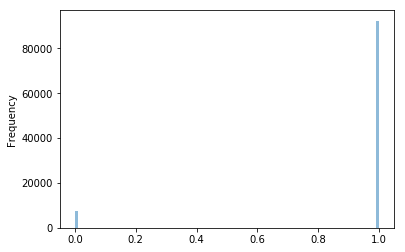

In [18]:
sample['label'].plot.hist(bins=100, alpha=0.5)

### particle_type
- 0: pion
- 1: muon
- 2: proton
- おそらく, BG vs signalではなくて, pion vs muon vs protonの3分類器を作って最後でBG vs signalの処理をした方が良さそう. 明らかにBGに違うものが混ざっていることになるので.

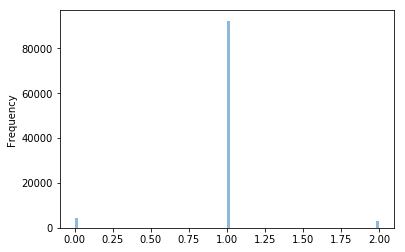

In [12]:
sample['particle_type'].plot.hist(bins=100, alpha=0.5)

- ここまで１が多いと, とりあえず1って予想しておけば割といきそう.
- 流石にそれの対策はしてると信じるけど.
- 全部1のsubmissionを試しにしてみるか?

### ncl
- integer
- umber of clusters in the N-th station (high-level variable).
- とても粒子の種類によりそう.

In [20]:
train_des[['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]']]

ncl[0]        ncl[1]        ncl[2]        ncl[3]
count  5.445705e+06  5.445705e+06  5.445705e+06  5.445705e+06
mean   6.276603e+01  1.952890e+01  1.244132e+01  1.301181e+01
std    3.223463e+01  1.268160e+01  7.450821e+00  6.380547e+00
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    3.800000e+01  1.000000e+01  7.000000e+00  8.000000e+00
50%    5.700000e+01  1.700000e+01  1.100000e+01  1.200000e+01
75%    8.200000e+01  2.600000e+01  1.600000e+01  1.600000e+01
max    3.340000e+02  2.050000e+02  9.100000e+01  8.700000e+01

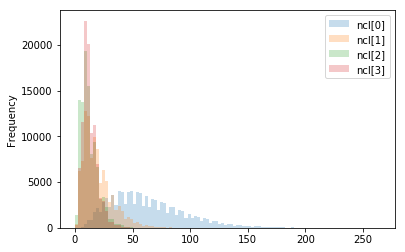

In [21]:
sample[['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]']].plot.hist(bins=100, alpha=0.25)

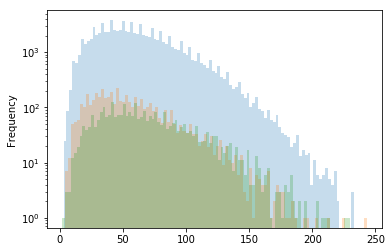

In [46]:
sample[sample['particle_type']==1].loc[:, 'ncl[0]'].plot.hist(bins=100, alpha=0.25, logy=True)
sample[sample['particle_type']==0].loc[:, 'ncl[0]'].plot.hist(bins=100, alpha=0.25, logy=True)
sample[sample['particle_type']==2].loc[:, 'ncl[0]'].plot.hist(bins=100, alpha=0.25, logy=True)

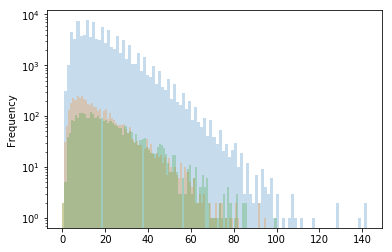

In [47]:
sample[sample['particle_type']==1].loc[:, 'ncl[1]'].plot.hist(bins=100, alpha=0.25, logy=True)
sample[sample['particle_type']==0].loc[:, 'ncl[1]'].plot.hist(bins=100, alpha=0.25, logy=True)
sample[sample['particle_type']==2].loc[:, 'ncl[1]'].plot.hist(bins=100, alpha=0.25, logy=True)

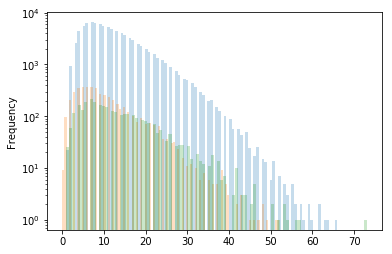

In [48]:
sample[sample['particle_type']==1].loc[:, 'ncl[2]'].plot.hist(bins=100, alpha=0.25, logy=True)
sample[sample['particle_type']==0].loc[:, 'ncl[2]'].plot.hist(bins=100, alpha=0.25, logy=True)
sample[sample['particle_type']==2].loc[:, 'ncl[2]'].plot.hist(bins=100, alpha=0.25, logy=True)

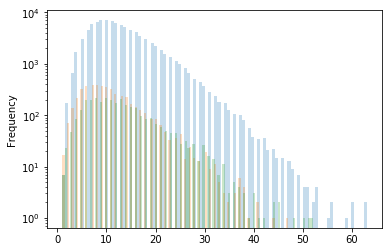

In [49]:
sample[sample['particle_type']==1].loc[:, 'ncl[3]'].plot.hist(bins=100, alpha=0.25, logy=True)
sample[sample['particle_type']==0].loc[:, 'ncl[3]'].plot.hist(bins=100, alpha=0.25, logy=True)
sample[sample['particle_type']==2].loc[:, 'ncl[3]'].plot.hist(bins=100, alpha=0.25, logy=True)

### avg_cs
- float ≥ 1
- average cluster size in the N-th station (high-level variable).
- とても粒子の種類によりそう.

In [22]:
train_des[['avg_cs[0]', 'avg_cs[1]', 'avg_cs[2]', 'avg_cs[3]']]

avg_cs[0]     avg_cs[1]     avg_cs[2]     avg_cs[3]
count  5.445705e+06  5.445705e+06  5.445705e+06  5.445705e+06
mean   2.465974e+00  2.116739e+00  1.446531e+00  1.359926e+00
std    6.572896e-01  7.766294e-01  3.672948e-01  4.310826e-01
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.012195e+00  1.571428e+00  1.187500e+00  1.125000e+00
50%    2.387097e+00  2.000000e+00  1.384615e+00  1.285714e+00
75%    2.821918e+00  2.500000e+00  1.636364e+00  1.500000e+00
max    1.334783e+01  5.800000e+01  1.475000e+01  3.200000e+01

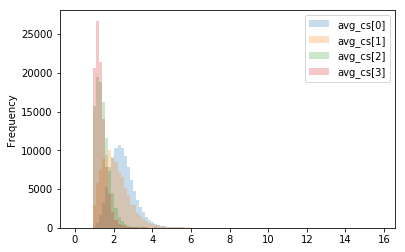

In [23]:
sample[['avg_cs[0]', 'avg_cs[1]', 'avg_cs[2]', 'avg_cs[3]']].plot.hist(bins=100, alpha=0.25)

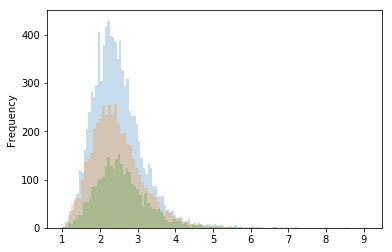

In [24]:
sample2[sample2['particle_type']==1].loc[:, 'avg_cs[0]'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==0].loc[:, 'avg_cs[0]'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==2].loc[:, 'avg_cs[0]'].plot.hist(bins=100, alpha=0.25)

/Users/yoneda/.pyenv/versions/2.7.14/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


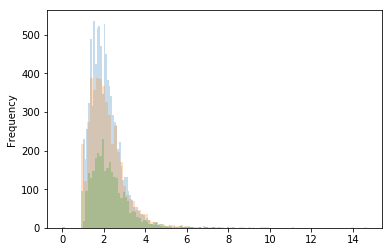

In [13]:
sample2[sample['particle_type']==1].loc[:, 'avg_cs[1]'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==0].loc[:, 'avg_cs[1]'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==2].loc[:, 'avg_cs[1]'].plot.hist(bins=100, alpha=0.25)

/Users/m_nakao/.pyenv/versions/anaconda3-2.4.1/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


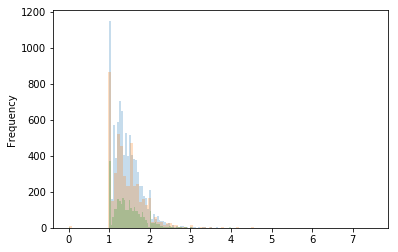

In [26]:
sample2[sample['particle_type']==1].loc[:, 'avg_cs[2]'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==0].loc[:, 'avg_cs[2]'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==2].loc[:, 'avg_cs[2]'].plot.hist(bins=100, alpha=0.25)

/Users/m_nakao/.pyenv/versions/anaconda3-2.4.1/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


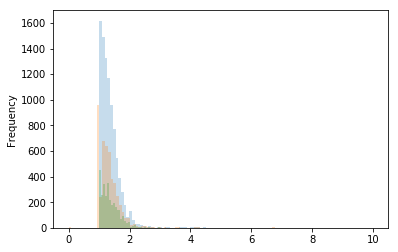

In [27]:
sample2[sample['particle_type']==1].loc[:, 'avg_cs[3]'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==0].loc[:, 'avg_cs[3]'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==2].loc[:, 'avg_cs[3]'].plot.hist(bins=100, alpha=0.25)

### ndof
- integer in {4, 6, 8}
- number of degrees of freedom used in chi2 computation, a function of momentum.
- これは何だろう? momentumの関数ってよくわからない.

In [28]:
train_des['ndof']

count    5.445705e+06
mean     7.931068e+00
std      4.016884e-01
min      4.000000e+00
25%      8.000000e+00
50%      8.000000e+00
75%      8.000000e+00
max      8.000000e+00
Name: ndof, dtype: float64

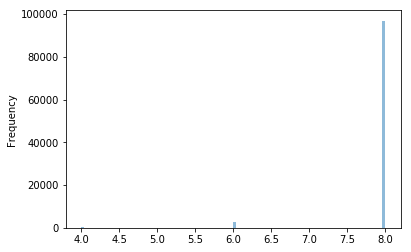

In [29]:
sample['ndof'].plot.hist(bins=100, alpha=0.5)

### MatchedHit_TYPE
- categorical in {1, 2}
- whether the matched hit is crossed. It is a technical field. 1 mean uncrossed, 2 means crossed.
- データ見てみないとよくわからん

In [30]:
train_des[['MatchedHit_TYPE[0]', 'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]']]

MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  MatchedHit_TYPE[2]  \
count        5.445705e+06        5.445705e+06        5.445705e+06   
mean         1.962494e+00        1.964487e+00        1.799664e+00   
std          1.899992e-01        1.850728e-01        4.394904e-01   
min          1.000000e+00        1.000000e+00        0.000000e+00   
25%          2.000000e+00        2.000000e+00        2.000000e+00   
50%          2.000000e+00        2.000000e+00        2.000000e+00   
75%          2.000000e+00        2.000000e+00        2.000000e+00   
max          2.000000e+00        2.000000e+00        2.000000e+00   

       MatchedHit_TYPE[3]  
count        5.445705e+06  
mean         1.787940e+00  
std          4.506361e-01  
min          0.000000e+00  
25%          2.000000e+00  
50%          2.000000e+00  
75%          2.000000e+00  
max          2.000000e+00

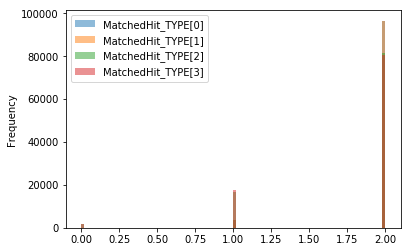

In [31]:
sample[['MatchedHit_TYPE[0]', 'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]']].plot.hist(bins=100, alpha=0.5)

### MatchedHit_*

#### position
- X
 - array, 4
- Y
 - array, 4
- Z
 - array, 4
- float
- coordinates of the hit in the N-th station that a physics-based tracking algorithm associated with the track. 
- DX
 - array, 4
- DY
 - array, 4
- DZ
 - array, 4
- float > 0
- uncertainty of the matched hit coordinates.

#### time
- T
    - integer in [1, 20]
    - timing of the matched hit.
- DT
    - integer
    - delta time for the matched hit in the N-th station.
    - 何からのdeltaだろう?

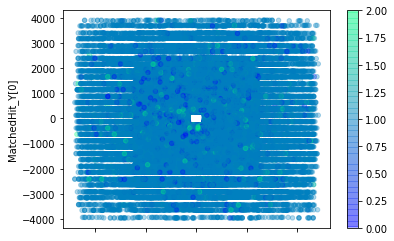

In [32]:
sample.plot(kind='scatter', x=u'MatchedHit_X[0]', y=u'MatchedHit_Y[0]', c=sample.particle_type, cmap='winter', alpha=0.3)

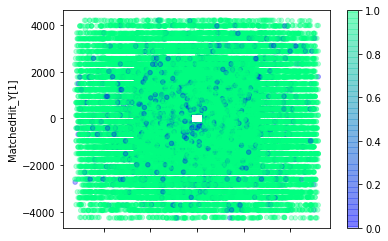

In [33]:
sample.plot(kind='scatter', x=u'MatchedHit_X[1]', y=u'MatchedHit_Y[1]', c=sample.label, cmap='winter', alpha=0.3)

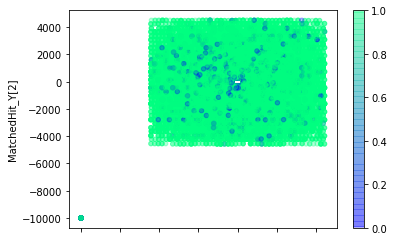

In [34]:
sample.plot(kind='scatter', x=u'MatchedHit_X[2]', y=u'MatchedHit_Y[2]', c=sample.label, cmap='winter', alpha=0.3)

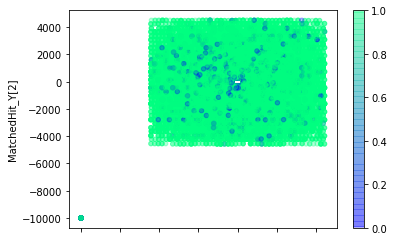

In [35]:
sample.plot(kind='scatter', x=u'MatchedHit_X[2]', y=u'MatchedHit_Y[2]', c=sample.label, cmap='winter', alpha=0.3)

### Lextra_*
- X
 - array, 4
- Y
 - array, 4
- float
- coordinates of the track extrapolation intersection with N-th station.
- 4 = {M2, M3, M4, M5}
- track extrapolationってことは, 実際のヒット位置ではなくtracking後の値か?

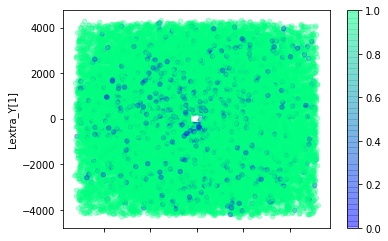

In [36]:
sample.plot(kind='scatter', x=u'Lextra_X[1]', y=u'Lextra_Y[1]', c=sample.label, cmap='winter', alpha=0.3)

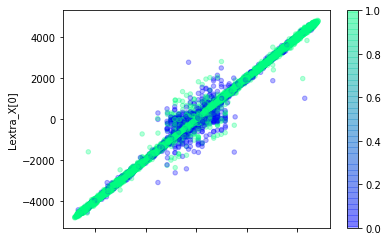

In [37]:
sample.plot(kind='scatter', x=u'MatchedHit_X[0]', y=u'Lextra_X[0]', c=sample.label, cmap='winter', alpha=0.3)




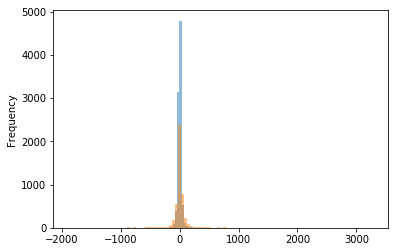

In [38]:
(sample2[sample2['particle_type']==1].loc[:, 'MatchedHit_X[0]']-sample2[sample2['particle_type']==1].loc[:, 'Lextra_X[0]']).plot.hist(bins=100, alpha=0.5)
(sample[sample['particle_type']==0].loc[:, 'MatchedHit_X[0]']-sample[sample['particle_type']==0].loc[:, 'Lextra_X[0]']).plot.hist(bins=100, alpha=0.5)
#(sample[sample['particle_type']==2].loc[:, 'MatchedHit_X[0]']-sample[sample['particle_type']==2].loc[:, 'Lextra_X[0]']).plot.hist(bins=100, alpha=0.5)




- 物理的意味わかってないけど, テイル部分がBG特にpionになりやすそう.

### NShared
- integer ≥ 0
- number of closest hits shared with the neighbouring tracks.
- とても粒子の種類によりそう.
- シャワーの広がりと相関あるかも? その場合はhadron shower or notで分類できるかもしれない.

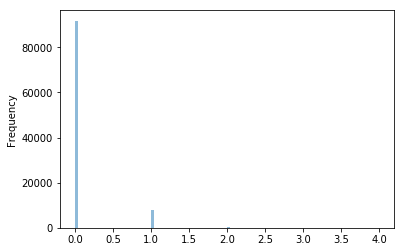

In [39]:
sample['NShared'].plot.hist(bins=100, alpha=0.5)

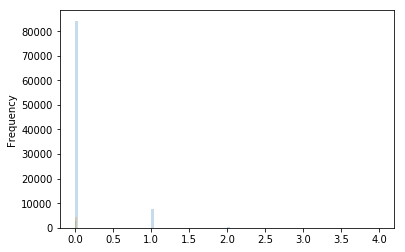

In [40]:
sample[sample['particle_type']==1].loc[:, 'NShared'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==0].loc[:, 'NShared'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==2].loc[:, 'NShared'].plot.hist(bins=100, alpha=0.25)

### Mextra_*
- DX2
- DY2
- float
- multiple scattering uncertainty for squared {X, Y, Z} coordinate of the track extrapolation.
- 名前が説明と違う?
- Lextra推定時の不定性か?
- multiple scatteringの寄与なら粒子で分けてみると何か見えるかもしれない.

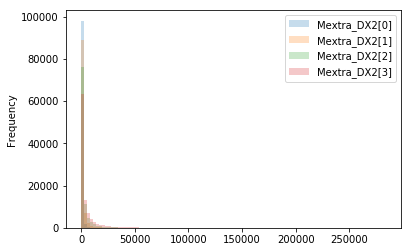

In [41]:
sample[['Mextra_DX2[0]', 'Mextra_DX2[1]', 'Mextra_DX2[2]', 'Mextra_DX2[3]']].plot.hist(bins=100, alpha=0.25)

/Users/m_nakao/.pyenv/versions/anaconda3-2.4.1/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


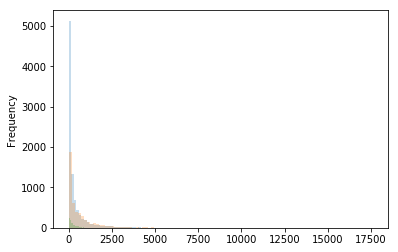

In [42]:
sample2[sample['particle_type']==1].loc[:, 'Mextra_DX2[0]'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==0].loc[:, 'Mextra_DX2[0]'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==2].loc[:, 'Mextra_DX2[0]'].plot.hist(bins=100, alpha=0.25)

### FOI_hits_*
- 情報多くて扱うの大変そう. とりあえずは後回しか?
- N
    - integer
    - number of hits inside a physics-deﬁned cone around the track (aka Field Of Interest, FOI).
- X
- Y
- Z
- DX
- DY
- DZ
- T
- DT
    - array of float of size FOI_hits_N
    - same as MatchedHit{,D}{X,Y,Z,T}, per hit.
- S
    - integer in {0, 3}
    - stations of the FOI hits. Numbering begins with 0.

### PT
- 説明にない
- transverse momentumか? なら使えそう

In [9]:
train_des['PT']

count    5.445705e+06
mean     2.405400e+03
std      2.645193e+03
min      8.000003e+02
25%      1.189333e+03
50%      1.767533e+03
75%      2.868593e+03
max      4.070073e+06
Name: PT, dtype: float64

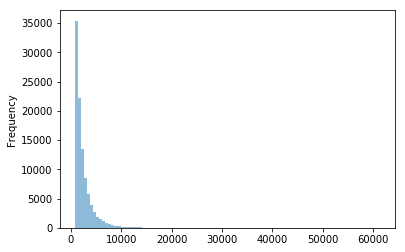

In [10]:
sample['PT'].plot.hist(bins=100, alpha=0.5)

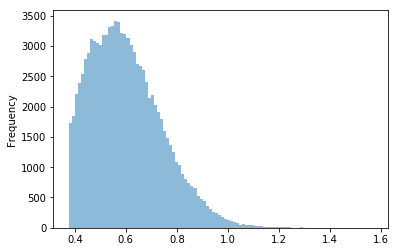

In [43]:
import numpy as np
sample['expPT'] = (sample['PT'] - 600)**0.25/10
sample['expPT'].plot.hist(bins=100, alpha=0.5)

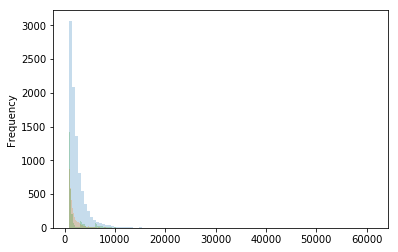

In [13]:
sample2[sample2['particle_type']==1].loc[:, 'PT'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==0].loc[:, 'PT'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==2].loc[:, 'PT'].plot.hist(bins=100, alpha=0.25)

- low PTあたりでcutできそう
- muon systemのPT thresholdは1.3GeVくらいらしいが, これは800あたりにthresholdがある.
- 単位はMeVで, 0.8GeV以上をデータに入れているだけか?

### P
- これも説明にない
- momentumか? なら使えそう

In [7]:
train_des['P']

count    5.445705e+06
mean     3.128861e+04
std      3.529453e+04
min      3.000040e+03
25%      1.151030e+04
50%      2.063266e+04
75%      3.810652e+04
max      2.040994e+07
Name: P, dtype: float64

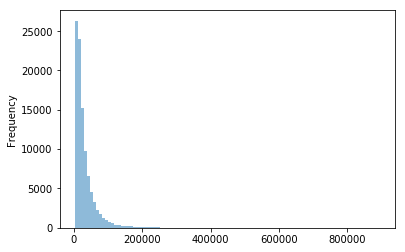

In [29]:
sample['P'].plot.hist(bins=100, alpha=0.5)

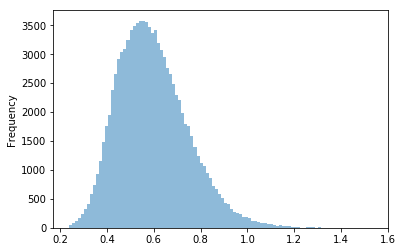

In [41]:
import numpy as np
sample['expP'] = (sample['P'] - 2500)**0.25/20
sample['expP'].plot.hist(bins=100, alpha=0.5)

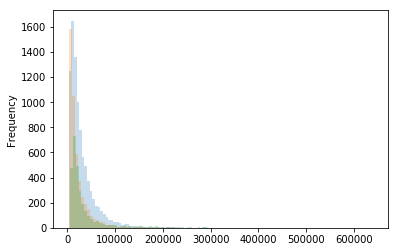

In [47]:
sample2[sample2['particle_type']==1].loc[:, 'P'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==0].loc[:, 'P'].plot.hist(bins=100, alpha=0.25)
sample[sample['particle_type']==2].loc[:, 'P'].plot.hist(bins=100, alpha=0.25)

- low PTあたりでcutできそう

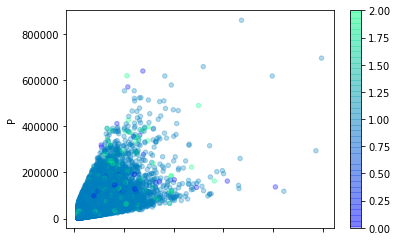

In [48]:
sample.plot(kind='scatter', x=u'PT', y=u'P', c=sample.particle_type, cmap='winter', alpha=0.3)

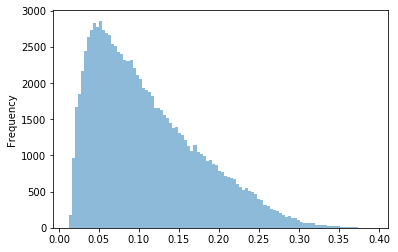

In [49]:
(sample['PT']/sample['P']).plot.hist(bins=100, alpha=0.5)

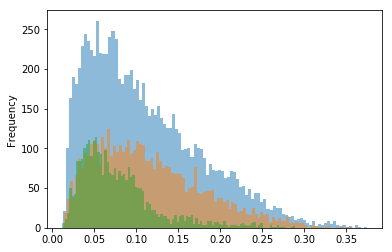

In [50]:
(sample2[sample2['particle_type']==1].loc[:, 'PT']/sample2[sample2['particle_type']==1].loc[:, 'P']).plot.hist(bins=100, alpha=0.5)
(sample[sample['particle_type']==0].loc[:, 'PT']/sample[sample['particle_type']==0].loc[:, 'P']).plot.hist(bins=100, alpha=0.5)
(sample[sample['particle_type']==2].loc[:, 'PT']/sample[sample['particle_type']==2].loc[:, 'P']).plot.hist(bins=100, alpha=0.5)


- ちょっとは違いありそうか

### sWeight
- float
- a component of the example weight that accounts for uncertainty in labeling.


### kinWeight
-  float > 0 
- a component of the example weight that equalizes kinematic observables between signal and background.

### weight
- sWeight * kinWeight

sum of weight of muon = 177153.0039382912
sum of weight of proton = 102710.65196641313
sum of weight of pion = 74464.71562632377


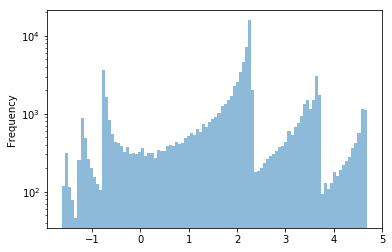

In [36]:
sample[sample['particle_type']==1].loc[:, 'weight'].plot.hist(bins=100, alpha=0.5, logy=True)
#sample[sample['particle_type']==0].loc[:, 'weight'].plot.hist(bins=100, alpha=0.5, logy=True)
#sample[sample['particle_type']==2].loc[:, 'weight'].plot.hist(bins=100, alpha=0.5, logy=True)
print("sum of weight of muon =",sample[sample['particle_type']==1].loc[:, 'weight'].sum())
print("sum of weight of proton =",sample[sample['particle_type']==0].loc[:, 'weight'].sum())
print("sum of weight of pion =",sample[sample['particle_type']==2].loc[:, 'weight'].sum())

sum of weight of muon = 177153.0039382912
sum of weight of proton = 102710.65196641313
sum of weight of pion = 74464.71562632377


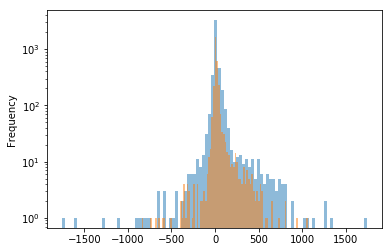

In [37]:
#sample[sample['particle_type']==1].loc[:, 'weight'].plot.hist(bins=100, alpha=0.5, logy=True)
sample[sample['particle_type']==0].loc[:, 'weight'].plot.hist(bins=100, alpha=0.5, logy=True)
sample[sample['particle_type']==2].loc[:, 'weight'].plot.hist(bins=100, alpha=0.5, logy=True)
print("sum of weight of muon =",sample[sample['particle_type']==1].loc[:, 'weight'].sum())
print("sum of weight of proton =",sample[sample['particle_type']==0].loc[:, 'weight'].sum())
print("sum of weight of pion =",sample[sample['particle_type']==2].loc[:, 'weight'].sum())

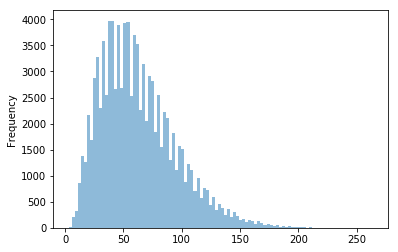

In [51]:
sample['ncl[0]'].plot.hist(bins=100, alpha=0.5)

## Event display
- trackの3次元構造を見ておきたい.
- LextraとMatchedHitでそれぞれプロットして見て違いを確認する.
- FOIを使った方が見やすいのか?
- 同じeventは何でタグされている?
    - 各idが一つのeventっぽい.

## 試しに適当学習
### そのためにとりあえず使えそうな変数
#### 説明変数
- Matched - Lextra
- P
- PT
#### 目的変数
- particle_type